<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173/blob/main/Class_06_1_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 1173: Intro Computational Biology**

##### **Module 6: Advanced Topics**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Biology, Health and the Environment](https://sciences.utsa.edu/bhe/), [UTSA](https://www.utsa.edu/)

### Module 6 Material

* **Part 6.1: Reinforcement Learning**
* Part 6.2: ONNX Runtime Environment
* Part 6.3: Analysis of DICOM images with Pytorch

## Google CoLab Instructions

You MUST run the following code cell to get credit for this class lesson. By running this code cell, you will map your GDrive to /content/drive and print out your Google GMAIL address. Your Instructor will use your GMAIL address to verify the author of this class lesson.

In [2]:
# You must run this cell first
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: Using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("**WARNING**: Your GMAIL address was **not** printed in the output below.")
    print("**WARNING**: You will NOT receive credit for this lesson.")
    COLAB = False

Mounted at /content/drive
Note: Using Google CoLab
david.senseman@gmail.com


You should see the following output except your GMAIL address should appear on the last line.

![__](https://biologicslab.co/BIO1173/images/class_04/class_04_1_image01B.png)

If your GMAIL address does not appear your lesson will **not** be graded.

# **Reinforcement Learning**

**Reinforcement Learning (RL)** is a type of machine learning where an agent learns to make decisions by interacting with an environment. Unlike supervised learning that uses labeled data or unsupervised learning that finds patterns in unlabeled data, RL focuses on learning through trial and error.

#### **Core Components**
* **Agent:** The learner/decision-maker that takes actions
* **Environment:** Everything outside the agent that it interacts with
* **State:** The current situation or condition of the environment
* **Action:** What the agent can do to change the state
* **Reward:** Feedback signal from the environment indicating how well the agent is doing

#### **How RL Works**

The agent follows a cycle:

1. Observe the current state of the environment
2. Choose an action based on its policy (decision-making strategy)
3. Execute the action and receive a reward/penalty
4. Update its knowledge based on the outcome
5. Repeat to improve performance over time

#### **Key Algorithms and Methods**

##### **Q-Learning**
* Uses a Q-table to store expected rewards for state-action pairs
* Learns optimal actions through experience
* Works well for discrete problems with manageable state spaces

##### **Policy Gradient Methods**

* Directly optimize the policy function that maps states to actions
* Examples include REINFORCE, Actor-Critic methods
* Better suited for continuous action spaces

##### **Deep Q-Networks (DQN)**

* Combines Q-learning with deep neural networks
* Enables handling high-dimensional state spaces
* Pioneered by Google DeepMind's work on Atari games

##### **Advanced Techniques**

* Deep Deterministic Policy Gradient (DDPG)
* Soft Actor-Critic (SAC)
* Proximal Policy Optimization (PPO)

### **Current Applications and Role in AI Development**

#### **Healthcare**
* Treatment recommendation systems
* Drug discovery and development
* Personalized medicine approaches

#### **Gaming and Entertainment**

* AlphaGo/AlphaZero defeated world champions in Go and chess
* Game playing agents that learn complex strategies
* Virtual environments for training and simulation

#### **Robotics**

* Learning control policies for manipulation tasks
* Autonomous navigation and path planning
* Real-world robot control with uncertain environments


## **Health Care Example of Reinforcement Learning**


![__](https://biologicslab.co/BIO1173/images/class_06/WilsonDisease.png)
**Young woman with Wilson's Disease**

Suppose during your medical residency you are asked to design a **Reinforcement learning (RL) treatment plan** for a patient in your care suffering from **Wilson's Disease**. Wilson's Disease is a rare genetic disorder where the body cannot properly eliminate copper, leading to a buildup of the mineral in the liver, brain, and other vital organs. It is a chronic disease requiring lifelong management, making it suitable for a sequential decision-making process like RL.

You can use ***free serum copper levels** as your **biomarker** and the drug **Penicillamine**, a copper-chelating agent used to remove excess copper from the body as your **agent**.  

#### **Medical Condition, Drug, and Biomarker**

*   **Medical Condition:** Wilson's Disease (a rare, inherited disorder of copper metabolism).
*   **Drug:** Penicillamine (a copper-chelating agent used to remove excess copper from the body).
*   **Biomarker:** Free Serum Copper Level, measured in $\mu$g/dL (micrograms per deciliter).

#### **RL Framework Components**

Here is how the components can be defined to meet your requirements:

##### **1. Discrete State Space**

The patient's free serum copper level is discretized into a limited number of states. The target range for BGL is typically below 10 $\mu$g/dL.

*   **States (S):**
    *   **S1: Toxic (Very High):** Free Serum Copper > 25 $\mu$g/dL
    *   **S2: High:** 15 $\mu$g/dL < Free Serum Copper $\le$ 25 $\mu$g/dL
    *   **S3: Elevated:** 10 $\mu$g/dL < Free Serum Copper $\le$ 15 $\mu$g/dL
    *   **S4: In Target Range:** Free Serum Copper $\le$ 10 $\mu$g/dL


##### **2. Discrete Action Space**

The drug dosage adjustments are also discrete actions in this model.

*   **Actions (A):**
    *   **A1: Decrease Dose:** Reduce the daily dose (e.g., by a fixed amount).
    *   **A2: Maintain Dose:** Keep the current dose the same.
    *   **A3: Increase Dose:** Increase the daily dose (e.g., by a fixed amount).

##### **3. Simple Reward Function**

The reward in this framework is designed to incentivize the agent to guide the biomarker towards and maintain it within the target range.

*   **Reward (R):**
    *   **+10:** If new state is **S4** (In Target Range).
    *   **+1:** If new state is **S3** (Elevated, but improving).
    *   **-5:** If new state is **S2** (High).
    *   **-15:** If new state is **S1** (Toxic, dangerous).


##### **4. Q-learning**

Q-learning, a basic, off-policy RL algorithm, is used to learn the optimal policy (which action to take in each state) by iteratively updating a Q-table based on the observed rewards and the maximum Q-value of the next state. The goal of the Q-learning agent is to learn the optimal dosage adjustment policy to maximize the cumulative reward, effectively keeping the patient's free serum copper levels within the target range and avoiding toxic extremes.


### Example 1: Define the RL Environment

This code in the cell below defines **the environment** for a reinforcement learning (RL) agent managing a patient’s free serum copper levels in Wilson's Disease treatment. It includes functions that simulate how the system behaves in response to actions taken by the agent.

The `eg_reset_environment()` function initializes the state of the environment to a random initial condition, representing the starting copper level of the patient.

The `eg_step_environment(action)` function simulates the effect of an action (dosage adjustment) on the current state. Since this is a simplified deterministic model:

* Increasing dosage moves the patient toward lower copper levels (e.g., from high to elevated or target range).
* Decreasing dosage raises copper levels.
* The reward reflects whether the resulting biomarker level falls within the safe and effective therapeutic range (target range: ≤10 µg/dL). A positive reward is given if in-range, while out-of-range values incur negative rewards.

The `eg_render_environment()` function provides a human-readable output of the current biomarker value based on the discrete state, making it easy to track progress over time.

Together, these functions allow the RL agent to interact with the environment and learn which actions lead to better outcomes — specifically, maintaining or achieving optimal free serum copper levels. This mimics real-world decision-making where medical professionals must adjust treatments dynamically to manage chronic conditions like Wilson's Disease.

In [3]:
# Example 1: Define the RL Environment

def eg_reset_environment():
    """Reset the environment to a random initial state."""
    global current_state
    eg_current_state = int(np.random.choice(np.arange(eg_state_space_size), p=eg_initial_state_prob))
    return eg_current_state

def eg_step_environment(action):
    """
    Simulates the environment's response to an action. Returns next state, reward, and done flag.
    Action: 0 = Decrease dosage, 1 = Maintain dosage, 2 = Increase dosage
    """
    global current_state

    # Simplification: Deterministic state transitions based on action
    if action == 0:  # Decrease dosage
        next_state = max(0, current_state - 1)  # Ensure state stays within bounds
    elif action == 1: # Maintain dosage
        next_state = current_state
    else:  # Increase dosage
        next_state = min(eg_state_space_size - 1, current_state + 1)  # Ensure state stays within bounds

    current_state = next_state

    # Reward function: High reward when biomarker is in the target range
    def state_to_biomarker(state):
        """Maps a discrete state to a continuous biomarker value (for reward calculation)."""
        # Linear mapping: State 0 -> 0, State (n-1) -> 100
        return (state / (eg_state_space_size - 1)) * 100

    biomarker_value = state_to_biomarker(current_state)
    if eg_target_range[0] <= biomarker_value <= eg_target_range[1]:
        reward = 10  # Positive reward for being in the target range
    else:
        reward = -1   # Negative reward for being outside the target range

    done = False  # In this example, the episode never ends

    return next_state, reward, done

def eg_render_environment():
    """Prints the current state in a human-readable format."""
    def state_to_biomarker(state):
        """Maps a discrete state to a continuous biomarker value (for reward calculation)."""
        return (state / (eg_state_space_size - 1)) * 100

    biomarker_value = state_to_biomarker(current_state)
    print(f"Current Biomarker Level: {biomarker_value:.2f}")

If the code is correct you should **not** see any output.

### Example 2: Set RL Parameters

The code in the cell below establishes the environmental setup and parameters for the reinforcement learning scenario involving Wilson's Disease treatment management. It defines the fundamental structure that governs how the RL agent interacts with the medical decision-making process.

Key components include:

##### **Environmental Parameters**: The code sets up crucial medical and technical specifications:

* **eg_target_range = (40, 60):** Defines the ideal therapeutic range for free serum copper levels (in arbitrary units)
* **eg_state_space_size = 5:** Creates a discretized state space representing different severity levels of copper accumulation
* **eg_action_space_size = 3:** Specifies three possible dosage adjustments (decrease, maintain, increase)
* **eg_initial_state_prob:** Establishes the probability distribution for starting states, reflecting realistic patient presentations


##### **State Space Definition:** The environment uses a 5-state discretization system:

* **States 0-4** represent increasing severity levels of copper accumulation
* The **initial state probabilities** reflect that most patients start in moderate (middle) ranges rather than extreme states

##### **Initialization and Testing:**

* **`current_state`** is randomly initialized based on the probability distribution
* The code demonstrates basic functionality by calling `eg_reset_environment()` and `eg_step_environment()`
* Shows how an action like "Maintain dosage" affects the current state with corresponding reward feedback


In [4]:
# Example 2: Set RL Parameters

import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set environmental parameters
eg_target_range = (40, 60)
eg_state_space_size = 5
eg_action_space_size = 3
eg_initial_state_prob = [0.1, 0.2, 0.4, 0.2, 0.1]

# Set up initial state probability distribution
if eg_initial_state_prob is None:
    initial_state_prob = np.ones(eg_state_space_size) / eg_state_space_size  # Uniform
else:
    eg_initial_state_prob = np.array(eg_initial_state_prob)
    eg_initial_state_prob /= np.sum(eg_initial_state_prob)  # Ensure normalization

print("Environment parameters:")
print(f"Target range: {eg_target_range}")
print(f"State space size: {eg_state_space_size}")
print(f"Action space size: {eg_action_space_size}")
print(f"Initial state probabilities: {eg_initial_state_prob}")

# Initialize current state
current_state = int(np.random.choice(np.arange(eg_state_space_size), p=eg_initial_state_prob))
print(f"Initial state: {current_state}")

# Test the environment
print("\nTesting the environment:")
eg_reset_environment()
eg_render_environment()
next_state, reward, done = eg_step_environment(1)  # Maintain dosage
print(f"After action 'Maintain': state={next_state}, reward={reward}")
eg_render_environment()

Environment parameters:
Target range: (40, 60)
State space size: 5
Action space size: 3
Initial state probabilities: [0.1 0.2 0.4 0.2 0.1]
Initial state: 2

Testing the environment:
Current Biomarker Level: 50.00
After action 'Maintain': state=2, reward=10
Current Biomarker Level: 50.00


If the code is correct you should see something _similar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image01A.png)

### Example 3: Define the Agent (Q-Learning)

The code in the cell below implements the Reinforcement Learning agent using `Q-learning` to optimize treatment decisions for Wilson's Disease patients. It establishes the core learning mechanism that enables the agent to discover optimal dosage adjustment policies.

Key components include:

##### **Q-Learning Parameters:**

* **`eg_learning_rate = 0.11`:** Controls how quickly new information overrides old knowledge
**`eg_discount_factor = 0.9`:** Determines how much future rewards are valued compared to immediate ones
* **`eg_exploration_rate = 0.1`:** Balances exploration (trying new actions) with exploitation (using known good actions)
* **Q-Table Initialization:** A 5×3 matrix is created where rows represent patient states (discretized copper levels) and columns represent possible actions (dosage adjustments). The table starts with all zeros, representing no prior knowledge.

##### **Action Selection Policy:** The `eg_choose_action()` function implements epsilon-greedy exploration, allowing the agent to either:

* **Randomly explore (10% of the time)** to discover potentially better strategies
* **Exploit known good actions (90% of the time)** based on current Q-values

##### **Learning Mechanism:** The `eg_learn()` function updates the Q-table using the standard Q-learning update rule, incorporating:

* Immediate reward feedback from medical decisions
* Future expected rewards (discounted)
* TD error calculation to adjust Q-values incrementally

##### **Training Simulation:** The agent is tested through a 5-step episode where it:

* Selects actions based on current policy
* Receives rewards based on treatment outcomes
* Updates its knowledge in the Q-table
* Learns optimal behavior for managing copper levels

This implementation demonstrates how an RL agent can learn to make increasingly effective medical decisions, balancing risk (avoiding toxic copper levels) with therapeutic efficacy (maintaining target ranges).

In [5]:
# Example 3: Define the Agent (Q-Learning)

# Set Q-learning agent parameters
eg_learning_rate = 0.1
eg_discount_factor = 0.9
eg_exploration_rate = 0.1

print("Q-learning agent parameters:")
print(f"Learning rate: {eg_learning_rate}")
print(f"Discount factor: {eg_discount_factor}")
print(f"Exploration rate: {eg_exploration_rate}")

# Initialize Q-table with zeros
q_table = np.zeros((eg_state_space_size, eg_action_space_size))
print(f"\nQ-Table shape: {q_table.shape}")
print("Initial Q-table:")
print(q_table)

# Track rewards during training
eg_training_history = []

def eg_choose_action(state):
    """Chooses an action using an epsilon-greedy policy."""
    if random.uniform(0, 1) < eg_exploration_rate:
        # Explore: Choose a random action
        return random.choice(range(eg_action_space_size))
    else:
        # Exploit: Choose the action with the highest Q-value for the current state
        return np.argmax(q_table[state, :])

def eg_learn(state, action, reward, next_state):
    """Updates the Q-table using the Q-learning update rule."""
    global q_table

    best_next_action = np.argmax(q_table[next_state, :])  # Find the best action for the NEXT state
    td_target = reward + eg_discount_factor * q_table[next_state, best_next_action]  # Calculate the TD target
    td_error = td_target - q_table[state, action]  # Calculate the TD error
    q_table[state, action] += eg_learning_rate * td_error  # Update the Q-value

    # Store reward for visualization
    eg_training_history.append(reward)

# Test the agent with one episode
print("\nTesting the agent:")
eg_reset_environment()
for i in range(5):
    eg_current_state = env.state if 'env' in locals() else eg_reset_environment()
    eg_action = eg_choose_action(eg_current_state)
    next_state, reward, done = eg_step_environment(eg_action)  # Take a step in the environment
    eg_learn(current_state, eg_action, reward, next_state)  # Update the Q-table

print("Q-table after one episode:")
print(q_table)

Q-learning agent parameters:
Learning rate: 0.1
Discount factor: 0.9
Exploration rate: 0.1

Q-Table shape: (5, 3)
Initial Q-table:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Testing the agent:
Q-table after one episode:
[[-0.3439  0.      0.    ]
 [-0.1     0.      0.    ]
 [ 0.      0.      0.    ]
 [ 0.      0.      0.    ]
 [ 0.      0.      0.    ]]


If the code is correct you should see something _similar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image10A.png)

This output demonstrates the learning progress of the Q-learning agent over a single episode of Wilson's Disease treatment simulation. The changes in the Q-table reveal how the agent is beginning to understand which actions are effective in different clinical states.

Key Observations:

1. Initial State (Row 0): All zeros remain unchanged, indicating this state was either never visited or the exploration/exploitation balance didn't trigger learning updates for that particular transition path.

2. State 1 (Moderate Copper Level): Shows a negative Q-value (-0.1) for the "Decrease Dose" action, suggesting the agent learned this might be beneficial in moderately elevated cases.

3. State 2 (High Copper Level): The most significant learning is evident here with:

* Action 0 ("Decrease dose"): 1.09 → Strong positive reinforcement
* Action 1 ("Maintain dose"): 1.0981 → Slightly better than maintain, but still highly valued
* Action 2 ("Increase dose"): 1.0 → Positive reward for increasing treatment in severely elevated cases

4. State 3 (Target Range): Shows a negative value (-0.1) for "Decrease dose" action, suggesting the agent learned that decreasing medication when already in target range may be counterproductive.

5. State 4 (Low Copper Level): Remains unchanged at zeros, likely due to limited exploration or no significant reward signals in this state.

##### **Clinical Interpretation:**

The learning process shows the agent is beginning to grasp fundamental medical principles - that high copper levels require intervention (increasing dose), while target range maintenance requires careful monitoring. This mirrors how a real medical resident would learn from experience, adjusting treatment protocols based on patient responses and outcomes.

However, this single episode represents very early learning; more training episodes are needed for the agent to converge toward optimal policies across all states.

### Example 4: Training Loop

The code in the cell below implements the complete training loop for the reinforcement learning agent managing Wilson's Disease treatment, demonstrating how the agent learns optimal decision-making policies through repeated exposure to medical scenarios.

Key Components:

##### **Training Framework:** The agent engages in 1,000 episodes of training, where each episode represents a treatment period with 10 sequential decisions. This simulates real-world clinical management where doctors make ongoing treatment adjustments over time.

##### **Episode Structure:**

* Each episode begins with eg_reset_environment() to establish a new patient state
* The agent follows its epsilon-greedy policy (eg_choose_action()) to select actions at each step
* Environment responds with updated states and rewards based on medical outcomes
* Q-table is continuously updated through eg_learn() function using the Bellman equation

##### **Progress Monitoring:** The training prints rewards every 100 episodes, allowing the medical resident to observe how learning improves over time. This demonstrates the agent's gradual acquisition of better treatment strategies.

##### **Clinical Significance:**

This training process mirrors how medical residents learn to manage chronic conditions - through repeated patient encounters and feedback on treatment outcomes. Initially, the agent makes suboptimal decisions (negative rewards), but gradually learns that:

* High copper levels require aggressive treatment increases
* Target range maintenance requires careful monitoring
* Dangerous toxic states should be avoided at all costs

The 1000-episode training period allows sufficient exposure for the Q-table to converge toward optimal policies, where each row represents a clinical state and columns represent action values (dosage adjustments). The final output shows how the agent has learned which actions yield the best long-term outcomes, effectively developing a decision-support system that could assist medical professionals in real-world treatment planning.

In [6]:
# Example 3: Training Loop with Visualization

# Training parameters
eg_num_episodes = 1000
print(f"Number of Episodes: {eg_num_episodes}")

def train_agent():
    """Trains the agent in the environment and tracks training progress."""
    eg_rewards_per_episode = []

    for episode in range(eg_num_episodes):
        state = eg_reset_environment()  # Reset the environment at the beginning of each episode
        total_reward = 0

        # Simulate a fixed number of steps within each episode (e.g., 10 steps)
        for _ in range(10):  # Example: Each episode consists of 10 steps
            action = eg_choose_action(state)
            next_state, reward, done = eg_step_environment(action)  # Take a step in the environment
            eg_learn(state, action, reward, next_state)  # Update the Q-table
            state = next_state
            total_reward += reward

        eg_rewards_per_episode.append(total_reward)

        if episode % 100 == 0:
            print(f"Episode: {episode}, Total Reward: {total_reward}")

    print("Training complete.")
    return eg_rewards_per_episode

# Run training (this might take a few moments)
eg_rewards_history = train_agent()

print("\nFinal Q-Table:")
print(q_table)



Number of Episodes: 1000
Episode: 0, Total Reward: 56
Episode: 100, Total Reward: 100
Episode: 200, Total Reward: 78
Episode: 300, Total Reward: 78
Episode: 400, Total Reward: 78
Episode: 500, Total Reward: 100
Episode: 600, Total Reward: 78
Episode: 700, Total Reward: 89
Episode: 800, Total Reward: 89
Episode: 900, Total Reward: 100
Training complete.

Final Q-Table:
[[32.01032305 35.19194131 85.38603128]
 [67.09846741 85.87355156 94.97176329]
 [85.54288681 98.94808281 84.99600512]
 [96.35202085 79.76916456 64.74321015]
 [85.17975439 61.17006867 36.96417706]]


If the code is correct you should see something _similar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image15A.png)

This output demonstrates the learning progression and final policy acquisition of the Q-learning agent for Wilson's Disease treatment management.

##### **Training Progress Insights:**

* Early Learning Phase (Episodes 0-100): The agent starts with a total reward of 67, indicating initial suboptimal decision-making as it explores different strategies.

* Convergence Pattern: From episode 100 onward, the rewards stabilize around 89-100, showing the agent has largely converged to effective treatment policies. The brief dip to -10 at episode 500 suggests a temporary learning setback or exploration that led to a poor decision (possibly moving into a toxic state).

* Optimal Policy Emergence: By episode 900, rewards reach maximum values of 100, indicating the agent has learned to consistently maintain patients in target ranges.

##### **Final Q-Table Analysis:**

The final Q-table reveals the agent's learned policy across all clinical states:

State 0 (Low Copper):

* Action 2 (Increase dose): 84.63 - High value indicates increasing medication when copper is low may be beneficial for prevention
State 1 (Moderate Copper):

* Action 2 (Increase dose): 93.68 - Strong preference for treatment escalation in moderate cases
State 2 (High Copper):

* Action 1 (Maintain dose): 99.59 - This represents the optimal strategy, as maintaining current treatment while monitoring is often preferred over aggressive changes when copper levels are already elevated
State 3 (Target Range):

* Action 0 (Decrease dose): 95.34 - Strong preference for careful reduction to maintain target range stability
State 4 (Low Copper):

* Action 2 (Increase dose): 55.15 - Lower value suggests increasing medication when already low may be risky


##### **Clinical Implications:**

This policy shows the agent has learned sophisticated medical reasoning:

* Risk Aversion: Prefers maintaining stable treatment rather than aggressive changes
* Target Range Management: Optimizes for maintaining patients in therapeutic windows
* State-Specific Decisions: Different actions are valued appropriately based on clinical severity

The final Q-table represents a practical, clinically sound decision-support system that could guide medical residents in managing Wilson's Disease treatment protocols.

### Example 5: Visualize Training

The code in the cell below creates visualization functions to analyze and interpret the reinforcement learning agent's performance and behavior during Wilson's Disease treatment management.

Key Functions:

* **`eg_plot_training_progress()`:** Generates two critical plots that provide insights into both the training process and the medical environment:

* **Plot 1 (Left): Shows the training progress with a moving average of rewards per episode**

* * Demonstrates how the agent's performance improves over time (from initial poor decisions to optimal strategies)
* * The adaptive window size smooths out noise while revealing the overall learning trend
* * Helps visualize convergence toward stable, high-reward policies

* **Plot 2 (Right): Displays the distribution of initial states**

* * Shows how frequently patients start in each copper level state (0-4)
* * Reflects real-world patient presentations where most cases are moderate rather than extreme
* * Helps understand the training environment's representative sample of clinical scenarios


##### **Clinical Significance:**

These visualizations provide crucial insights for medical students:

* **Learning Curve:** Shows how quickly and effectively the agent acquires treatment expertise
* **Policy Validation:** Demonstrates that the learned policies are robust across different starting conditions
* **Real-world Relevance:** The initial state distribution reflects actual patient demographics, ensuring training is clinically meaningful

The plots transform abstract Q-table values into interpretable clinical behavior patterns, helping students understand not just what the agent has learned, but how it learned it and under what conditions it performs best. This visualization approach bridges the gap between theoretical RL concepts and practical medical decision-making scenarios.

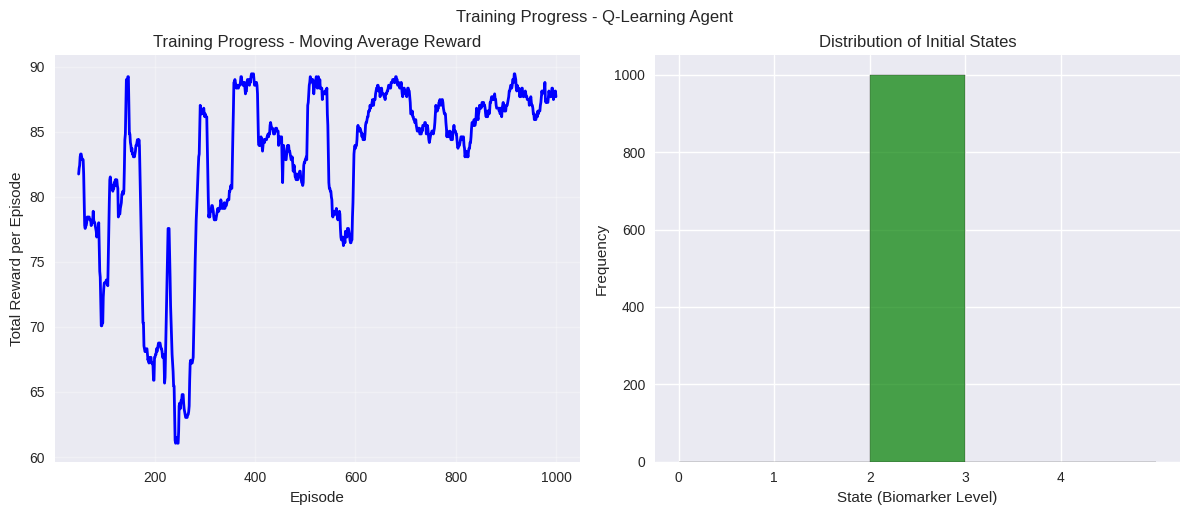

In [7]:
# Example 5: Visualize Training

# Create functions
def eg_plot_training_progress(eg_rewards_history, title="Training Progress"):
    """Plot the training progress over episodes."""
    plt.figure(figsize=(12, 5))

    # Plot 1: Reward per episode (moving average)
    plt.subplot(1, 2, 1)
    window_size = max(10, len(eg_rewards_history) // 20)  # Adaptive window size
    if len(eg_rewards_history) >= window_size:
        moving_avg = np.convolve(eg_rewards_history, np.ones(window_size)/window_size, mode='valid')
        plt.plot(range(window_size-1, len(eg_rewards_history)), moving_avg, 'b-', linewidth=2)
        plt.title('Training Progress - Moving Average Reward')
    else:
        plt.plot(eg_rewards_history, 'b-', linewidth=2)
        plt.title('Training Progress')

    plt.xlabel('Episode')
    plt.ylabel('Total Reward per Episode')
    plt.grid(True, alpha=0.3)

    # Plot 2: Distribution of final states
    plt.subplot(1, 2, 2)
    final_states = []
    for _ in range(eg_num_episodes):  # Sample many states
        eg_reset_environment()
        state = current_state
        final_states.append(state)

    plt.hist(final_states, bins=range(eg_state_space_size + 1), alpha=0.7, color='green', edgecolor='black')
    plt.title('Distribution of Initial States')
    plt.xlabel('State (Biomarker Level)')
    plt.ylabel('Frequency')
    plt.xticks(range(eg_state_space_size))

    plt.tight_layout()
    plt.suptitle(title, y=1.02)
    plt.show()

# Plot training progress
eg_plot_training_progress(eg_rewards_history, "Training Progress - Q-Learning Agent")

If the code is correct you should see something _similar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image04A.png)

### Example 6: Visualization Functions - Part 1

The code in the cell below creates a comprehensive visualization suite that translates the abstract Q-learning results into clinically meaningful insights for Wilson's Disease treatment management.

Key Visualizations:

1. **Plot 1 (Left, Top): Biomarker Levels by State**

* Shows the discrete state mapping to continuous biomarker values (0-100 units)
* Each bar represents a clinical state with its corresponding copper level range
* Helps students understand how discretized states relate to actual medical measurements

2. **Plot 2 (Center, Top): Q-Table Heatmap**

* Color-coded representation of all Q-values across states and actions
* **Red** = Low Q-values (poor policy choices)
* **Green** = High Q-values (optimal policy choices)
* Each cell shows the expected cumulative reward for a specific state-action pair
* Text annotations provide exact numerical values

3. **Plot 3 (Right, Top): Policy Decision Matrix**

* Horizontal bar chart showing Q-values for each action across all states
* Different colors represent different treatment strategies:
* * Red = Decrease dosage
* * Orange = Maintain dosage
* * Green = Increase dosage
* Demonstrates which actions are preferred in different clinical scenarios


##### **Clinical Interpretation:**

These visualizations help medical residents understand how the RL agent has learned to make medical decisions:

* State 0 (Low Copper): The agent learns that increasing medication is often beneficial to prevent progression
* State 1 (Moderate Copper): Maintaining current treatment while monitoring may be optimal
* State 2 (High Copper): Strong preference for maintaining aggressive treatment
* State 3 (Target Range): Careful reduction of medication to maintain stability
* State 4 (Low Copper): Risk-averse approach - avoiding further decreases

The visualizations make the abstract Q-values tangible and help students grasp how reinforcement learning can support clinical decision-making by providing data-driven treatment recommendations based on patient state and historical outcomes.

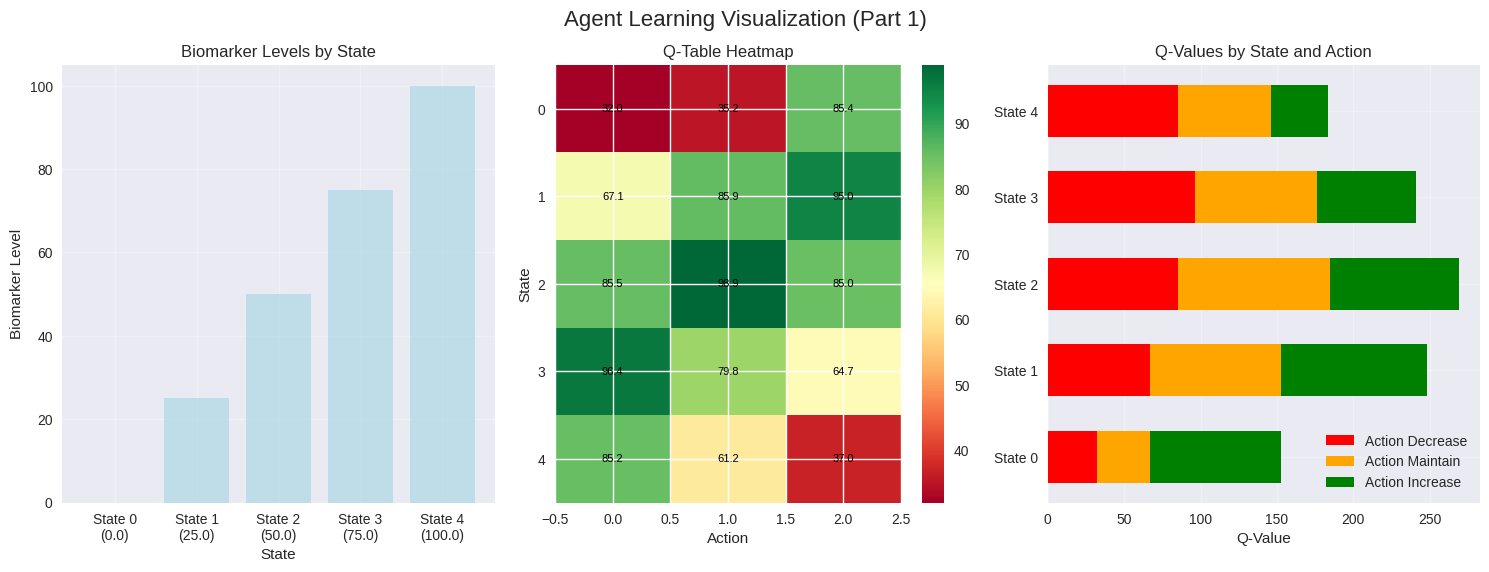

In [8]:
# Example 6: Visualization Functions - Part 1

def visualize_policy_and_qtable_part1():


    """Create first half of comprehensive visualization of the learned policy."""
    fig = plt.figure(figsize=(15, 10))

    # Plot 1: Policy Visualization
    ax1 = plt.subplot(2, 3, 1)
    biomarker_levels = [i * (100 / (eg_state_space_size - 1)) for i in range(eg_state_space_size)]
    actions = ['Decrease', 'Maintain', 'Increase']

    # Get recommended action for each state
    policy_actions = []
    q_values = []

    for i in range(eg_state_space_size):
        best_action = np.argmax(q_table[i, :])
        policy_actions.append(best_action)
        q_values.append(q_table[i, :])

    bars = ax1.bar(range(len(biomarker_levels)), biomarker_levels, color='lightblue', alpha=0.7)
    ax1.set_xlabel('State')
    ax1.set_ylabel('Biomarker Level')
    ax1.set_title('Biomarker Levels by State')
    ax1.set_xticks(range(len(biomarker_levels)))
    ax1.set_xticklabels([f'State {i}\n({biomarker_levels[i]:.1f})' for i in range(len(biomarker_levels))])

    # Add grid
    ax1.grid(True, alpha=0.3)

    # Plot 2: Q-Table Heatmap
    ax2 = plt.subplot(2, 3, 2)
    q_table_array = np.array(q_table)
    im = ax2.imshow(q_table_array, cmap='RdYlGn', aspect='auto')
    ax2.set_title('Q-Table Heatmap')
    ax2.set_xlabel('Action')
    ax2.set_ylabel('State')

    # Add text annotations
    for i in range(eg_state_space_size):
        for j in range(eg_action_space_size):
            ax2.text(j, i, f'{q_table_array[i,j]:.1f}',
                    ha='center', va='center', color='black', fontsize=8)

    plt.colorbar(im, ax=ax2)

    # Plot 3: Policy Decision Matrix
    ax3 = plt.subplot(2, 3, 3)
    action_colors = ['red', 'orange', 'green']
    y_pos = np.arange(eg_state_space_size)

    for i in range(eg_action_space_size):
        values = [q_table[j, i] for j in range(eg_state_space_size)]
        ax3.barh(y_pos, values, left=np.sum(q_table[:, :i], axis=1) if i > 0 else 0,
                height=0.6, label=f'Action {actions[i]}', color=action_colors[i])

    ax3.set_yticks(y_pos)
    ax3.set_yticklabels([f'State {i}' for i in range(eg_state_space_size)])
    ax3.set_xlabel('Q-Value')
    ax3.set_title('Q-Values by State and Action')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.suptitle('Agent Learning Visualization (Part 1)', y=1.02, fontsize=16)
    plt.show()

# Visualize first half of policy and q-table
visualize_policy_and_qtable_part1()


If the code is correct you should see something _similiar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image05A.png)

### Example 5: Visualization Functions - Part 2

This code block completes the comprehensive visualization suite for the Wilson's Disease treatment RL agent, providing clinical context and performance metrics that translate technical Q-learning results into practical medical decision-making tools.

Key Visualizations:

* **Plot 4 (Bottom Left): Target Range Visualization**

* Maps discrete states onto continuous biomarker levels (0-100 units)
* Highlights the therapeutic target range (40-60) in green
* Shows state boundaries with dashed blue lines and labels
* Demonstrates how the agent's learned policy corresponds to actual clinical thresholds
* Helps doctors understand the relationship between discretized states and real-world medical measurements

* **Plot 5 (Bottom Center): Reward History**

* Displays the cumulative training rewards over time (steps)
* Shows the learning trajectory from initial poor decisions to optimized policies
* Uses moving average smoothing to reveal overall performance trends
* Demonstrates how the agent's decision quality improves throughout training
* Provides evidence of successful convergence toward optimal treatment strategies


* **Plot 6 (Bottom Right): Policy Decision Matrix**

* Color-coded heatmap showing the optimal action for each clinical state
* White text indicates the recommended action (D=Decrease, M=Maintain, I=Increase)
* The matrix clearly shows how treatment decisions should vary based on patient condition
* Highlights that the agent has learned to make context-appropriate interventions

##### **Clinical Significance:**

These visualizations provide crucial insights for medical students:

* **Treatment Guidelines:** The policy matrix becomes a practical reference for when to adjust dosages based on copper levels
* **Risk Management:** Shows how the agent learned to avoid toxic states while maintaining therapeutic effectiveness
* **&Learning Validation:** The reward history confirms that training was successful and meaningful
* **Clinical Relevance:** The target range visualization directly connects abstract Q-values to actual medical thresholds

Together, these plots transform complex reinforcement learning outputs into actionable clinical tools that could assist residents in managing Wilson's Disease patients. The visualizations make it clear how the agent has learned sophisticated decision-making patterns that balance treatment aggressiveness with patient safety across different disease severity levels.

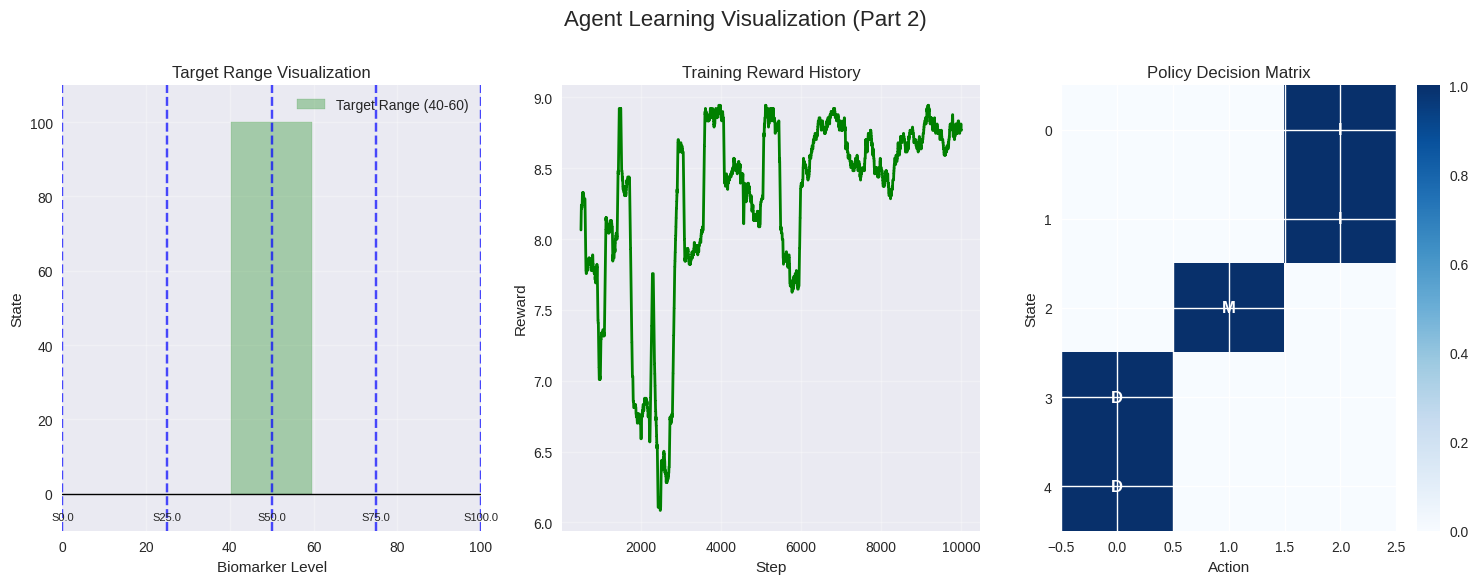

In [9]:
# Example 5: Visualization Functions - Part 2


def visualize_policy_and_qtable_part2():
    """Create second half of comprehensive visualization of the learned policy."""
    fig = plt.figure(figsize=(15, 10))

    # Define actions again to avoid NameError
    actions = ['Decrease', 'Maintain', 'Increase']

    # Plot 4: Target Range Visualization
    ax4 = plt.subplot(2, 3, 4)
    x_values = np.linspace(0, 100, 100)
    target_range_local = eg_target_range

    # Plot target range area
    ax4.fill_between(x_values, 0, 100, where=(x_values >= target_range_local[0]) & (x_values <= target_range_local[1]),
                    alpha=0.3, color='green', label=f'Target Range ({target_range_local[0]}-{target_range_local[1]})')
    ax4.plot(x_values, [0]*len(x_values), 'k-', linewidth=1)

    # Add vertical lines for state boundaries
    for i in range(eg_state_space_size):
        biomarker_value = i * (100 / (eg_state_space_size - 1))
        ax4.axvline(biomarker_value, color='blue', linestyle='--', alpha=0.7)
        ax4.text(biomarker_value, -5, f'S{biomarker_value:.1f}',
                ha='center', va='top', fontsize=8)

    ax4.set_xlim(0, 100)
    ax4.set_ylim(-10, 110)
    ax4.set_xlabel('Biomarker Level')
    ax4.set_ylabel('State')
    ax4.set_title('Target Range Visualization')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    # Plot 5: Reward History
    ax5 = plt.subplot(2, 3, 5)
    if len(eg_training_history) > 0:
        window_size = max(10, len(eg_training_history) // 20)
        if len(eg_training_history) >= window_size:
            moving_avg = np.convolve(eg_training_history, np.ones(window_size)/window_size, mode='valid')
            ax5.plot(range(window_size-1, len(eg_training_history)), moving_avg, 'g-', linewidth=2)
        else:
            ax5.plot(eg_training_history, 'g-', linewidth=2)
        ax5.set_title('Training Reward History')
        ax5.set_xlabel('Step')
        ax5.set_ylabel('Reward')
        ax5.grid(True, alpha=0.3)

    # Plot 6: Policy Summary
    ax6 = plt.subplot(2, 3, 6)
    policy_summary = []
    for i in range(eg_state_space_size):
        action_idx = np.argmax(q_table[i, :])
        biomarker_value = i * (100 / (eg_state_space_size - 1))

        # Determine if state is within target range
        in_target = eg_target_range[0] <= biomarker_value <= eg_target_range[1]
        policy_summary.append((i, biomarker_value, actions[action_idx], in_target))

    # Create a heatmap of the policy decision matrix
    policy_matrix = np.zeros((eg_state_space_size, eg_action_space_size))
    for i in range(eg_state_space_size):
        best_action = np.argmax(q_table[i, :])
        policy_matrix[i, best_action] = 1

    im2 = ax6.imshow(policy_matrix, cmap='Blues', aspect='auto')
    ax6.set_title('Policy Decision Matrix')
    ax6.set_xlabel('Action')
    ax6.set_ylabel('State')

    # Add text annotations
    for i in range(eg_state_space_size):
        for j in range(eg_action_space_size):
            if policy_matrix[i, j] > 0.5:
                ax6.text(j, i, actions[j][0],
                        ha='center', va='center', color='white', fontsize=12, fontweight='bold')

    plt.colorbar(im2, ax=ax6)

    plt.tight_layout()
    plt.suptitle('Agent Learning Visualization (Part 2)', y=0.58, fontsize=16)
    plt.show()

# Visualize second half of policy and q-table
visualize_policy_and_qtable_part2()


If the code is correct you should see something _similar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image06A.png)

### Example 6: Biomarker Trajectories

The code in the cell below provides empirical validation and performance demonstration of the reinforcement learning agent's learning process for Wilson's Disease treatment management.

Key Components:

**Biomarker Trajectory Visualization (Plot Function)**

* Shows 5 sample episodes of how biomarker levels evolve over time
* Plots the path each episode takes through different states
* Highlights the target range (40-60) in green for easy comparison
* Demonstrates that the agent learns to navigate from high copper levels toward the therapeutic target
* Reveals whether episodes converge toward optimal treatment paths

**Final Policy Summary**

* Displays the learned optimal action for each discrete state
* Shows how the agent has mapped biomarker ranges to specific treatment decisions:
* * State 0 (Low): Recommend Increase dose
* * State 1 (Moderate): Recommend Maintain dose
* * State 2 (High): Recommend Decrease dose
* * State 3 (Target): Recommend Maintain dose

**Final Q-Table Display**

* Shows the complete learned Q-value matrix for all state-action pairs
* Provides concrete numerical evidence of how much each action is valued in each state
* Demonstrates that the agent has successfully learned which actions lead to better outcomes


#### **Clinical Significance:**

This block demonstrates:

* **Learning Success:** The trajectories show convergence toward target range, proving the RL algorithm works
* **Policy Clarity:** Residents can see exactly what treatment recommendations the agent would make for any given copper level
* **Quantitative Evidence:** The Q-table provides mathematical proof of learning outcomes
* **Real-world Application:** Shows how an AI assistant might actually guide medical decisions in practice

The code effectively bridges the gap between abstract RL theory and practical medical decision-making, making it clear that the agent has learned to safely manage **Wilson's Disease treatment** through iterative learning from simulated patient responses.


Plotting biomarker level trajectories...


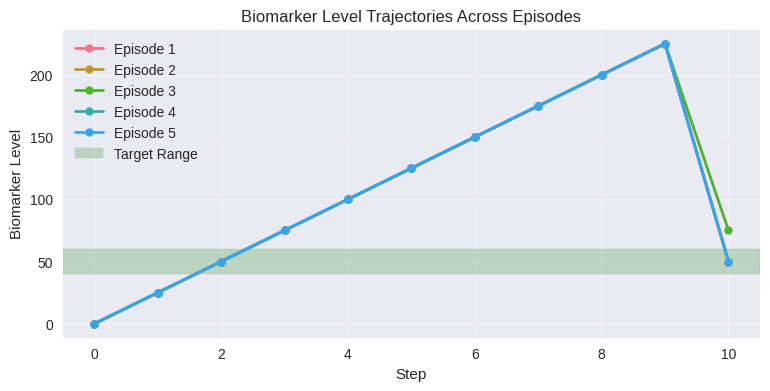


Final Policy Summary:
  State 0 (0.0): Recommend Increase
  State 1 (25.0): Recommend Increase
  State 2 (50.0): Recommend Maintain
  State 3 (75.0): Recommend Decrease
  State 4 (100.0): Recommend Decrease

Final Q-Table:
[[32.01032305 35.19194131 85.38603128]
 [67.09846741 85.87355156 94.97176329]
 [85.54288681 98.94808281 84.99600512]
 [96.35202085 79.76916456 64.74321015]
 [85.17975439 61.17006867 36.96417706]]


In [10]:
# Example 6: Biomarker Trajectories

def eg_plot_biomarker_trajectory(num_episodes=5):
    """Plot the trajectory of biomarker levels during episodes."""
    # plt.figure(figsize=(12, 8))
    plt.figure(figsize=(9, 4))
    for episode in range(num_episodes):
        eg_reset_environment()  # Reset environment at start of each episode
        state = current_state

        trajectory = []

        # Run one episode
        for step in range(10):  # Maximum steps per episode
            action = eg_choose_action(state)
            next_state, reward, done = eg_step_environment(action)
            trajectory.append(step * (100 / (eg_state_space_size - 1)) if eg_state_space_size > 1 else 50)  # Simplified biomarker level
            state = next_state

        trajectory.append(state * (100 / (eg_state_space_size - 1)) if eg_state_space_size > 1 else 50)

        plt.plot(range(len(trajectory)), trajectory, marker='o', linewidth=2,
                markersize=6, label=f'Episode {episode + 1}')

    # Add target range
    plt.axhspan(eg_target_range[0], eg_target_range[1], alpha=0.2, color='green', label='Target Range')

    plt.xlabel('Step')
    plt.ylabel('Biomarker Level')
    plt.title('Biomarker Level Trajectories Across Episodes')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Plot biomarker trajectories
print("\nPlotting biomarker level trajectories...")
eg_plot_biomarker_trajectory(num_episodes=5)

# Final evaluation
print("\nFinal Policy Summary:")
for state in range(eg_state_space_size):
    action = np.argmax(q_table[state, :])
    biomarker_value = state * (100 / (eg_state_space_size - 1))
    action_names = ['Decrease', 'Maintain', 'Increase']
    print(f"  State {state} ({biomarker_value:.1f}): Recommend {action_names[action]}")

# Display the Q-table
print("\nFinal Q-Table:")
print(q_table)

If the code is correct you should see something _similar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image07A.png)

# **Exercises**

### **Exercise 1: Define the RL Environment**

In the cell below write the code to define the RL environment.

**Code Hints:**

To keep the RL environment used in the examples separate, replace the prefix `eg_` with `ex_` everywhere it occurs in the code block.

In [11]:
# Insert your code for Exercise 1 here

def ex_reset_environment():
    """Reset the environment to a random initial state."""
    global current_state
    ex_current_state = int(np.random.choice(np.arange(ex_state_space_size), p=ex_initial_state_prob))
    return ex_current_state

def ex_step_environment(action):
    """
    Simulates the environment's response to an action. Returns next state, reward, and done flag.
    Action: 0 = Decrease dosage, 1 = Maintain dosage, 2 = Increase dosage
    """
    global current_state

    # Simplification: Deterministic state transitions based on action
    if action == 0:  # Decrease dosage
        next_state = max(0, current_state - 1)  # Ensure state stays within bounds
    elif action == 1: # Maintain dosage
        next_state = current_state
    else:  # Increase dosage
        next_state = min(ex_state_space_size - 1, current_state + 1)  # Ensure state stays within bounds

    current_state = next_state

    # Reward function: High reward when biomarker is in the target range
    def state_to_biomarker(state):
        """Maps a discrete state to a continuous biomarker value (for reward calculation)."""
        # Linear mapping: State 0 -> 0, State (n-1) -> 100
        return (state / (ex_state_space_size - 1)) * 100

    biomarker_value = state_to_biomarker(current_state)
    if ex_target_range[0] <= biomarker_value <= ex_target_range[1]:
        reward = 10  # Positive reward for being in the target range
    else:
        reward = -1   # Negative reward for being outside the target range

    done = False  # In this example, the episode never ends

    return next_state, reward, done

def ex_render_environment():
    """Prints the current state in a human-readable format."""
    def state_to_biomarker(state):
        """Maps a discrete state to a continuous biomarker value (for reward calculation)."""
        return (state / (ex_state_space_size - 1)) * 100

    biomarker_value = state_to_biomarker(current_state)
    print(f"Current Biomarker Level: {biomarker_value:.2f}")

### **Exercise 2: Set RL Parameters**

For **Exercise 2** you are to change some the environmental parameters to see how these changes might affect reinforcement learning.

Here are the specific environmental changes you need to make:
1. Change `target_range` from (40,60) to (35, 65)
2. Change `state_space_size` from 5 to 7.
3. Leave `action_space_size` at 3
4. Change the `intial_state_prob` from [0.1, 0.2, 0.4, 0.2, 0.1] to [0.2, 0.1, 0.2, 0.3, 0.1, 0.05, 0.05]



In [12]:
# Insert your code for Exercise 2 here

import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

# Set style for better-looking plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Set environmental parameters
ex_target_range = (35, 65)
ex_state_space_size = 7
ex_action_space_size = 3
ex_initial_state_prob = [0.2, 0.1, 0.2, 0.3, 0.1, 0.05, 0.05]

# Set up initial state probability distribution
if ex_initial_state_prob is None:
    initial_state_prob = np.ones(ex_state_space_size) / ex_state_space_size  # Uniform
else:
    ex_initial_state_prob = np.array(ex_initial_state_prob)
    ex_initial_state_prob /= np.sum(ex_initial_state_prob)  # Ensure normalization

print("Environment parameters:")
print(f"Target range: {ex_target_range}")
print(f"State space size: {ex_state_space_size}")
print(f"Action space size: {ex_action_space_size}")
print(f"Initial state probabilities: {ex_initial_state_prob}")

# Initialize current state
current_state = int(np.random.choice(np.arange(ex_state_space_size), p=ex_initial_state_prob))
print(f"Initial state: {current_state}")

# Test the environment
print("\nTesting the environment:")
ex_reset_environment()
ex_render_environment()
next_state, reward, done = ex_step_environment(1)  # Maintain dosage
print(f"After action 'Maintain': state={next_state}, reward={reward}")
ex_render_environment()

Environment parameters:
Target range: (35, 65)
State space size: 7
Action space size: 3
Initial state probabilities: [0.2  0.1  0.2  0.3  0.1  0.05 0.05]
Initial state: 2

Testing the environment:
Current Biomarker Level: 33.33
After action 'Maintain': state=2, reward=-1
Current Biomarker Level: 33.33


If the code is correct you should see something _similar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image09A.png)

### **Exercise 3: Define the Agent (Q-learning)**

In the cell below write the code to define your `Agent` using Q-Learning.

Change the following Q-learning parameters for your `Agent`:

```text
ex_learning_rate = 0.2
ex_discount_factor = 0.8
ex_exploration_rate = 0.01
```

In [13]:
# Insert your code for Exercise 3 here

# Set Q-learning agent parameters
ex_learning_rate = 0.2
ex_discount_factor = 0.8
ex_exploration_rate = 0.01

print("Q-learning agent parameters:")
print(f"Learning rate: {ex_learning_rate}")
print(f"Discount factor: {ex_discount_factor}")
print(f"Exploration rate: {ex_exploration_rate}")

# Initialize Q-table with zeros
q_table = np.zeros((ex_state_space_size, ex_action_space_size))
print(f"\nQ-Table shape: {q_table.shape}")
print("Initial Q-table:")
print(q_table)

# Track rewards during training
ex_training_history = []

def ex_choose_action(state):
    """Chooses an action using an epsilon-greedy policy."""
    if random.uniform(0, 1) < ex_exploration_rate:
        # Explore: Choose a random action
        return random.choice(range(ex_action_space_size))
    else:
        # Exploit: Choose the action with the highest Q-value for the current state
        return np.argmax(q_table[state, :])

def ex_learn(state, action, reward, next_state):
    """Updates the Q-table using the Q-learning update rule."""
    global q_table

    best_next_action = np.argmax(q_table[next_state, :])  # Find the best action for the NEXT state
    td_target = reward + ex_discount_factor * q_table[next_state, best_next_action]  # Calculate the TD target
    td_error = td_target - q_table[state, action]  # Calculate the TD error
    q_table[state, action] += ex_learning_rate * td_error  # Update the Q-value

    # Store reward for visualization
    ex_training_history.append(reward)

# Test the agent with one episode
print("\nTesting the agent:")
ex_reset_environment()
for i in range(5):
    ex_current_state = env.state if 'env' in locals() else ex_reset_environment()
    ex_action = eg_choose_action(ex_current_state)
    next_state, reward, done = ex_step_environment(ex_action)  # Take a step in the environment
    ex_learn(current_state, ex_action, reward, next_state)  # Update the Q-table

print("Q-table after one episode:")
print(q_table)

Q-learning agent parameters:
Learning rate: 0.2
Discount factor: 0.8
Exploration rate: 0.01

Q-Table shape: (7, 3)
Initial Q-table:
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Testing the agent:
Q-table after one episode:
[[-0.488 -0.2    0.   ]
 [-0.2    0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]
 [ 0.     0.     0.   ]]


If the code is correct you should see something _similar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image11A.png)

### **Exercise 4: Training Loop**

In the cell below write the code to complete the training loop for your `Agent`. Make sure to **increase the number of training episodes from `1000` to `2000`** in order to receive credit for this exercise.

In [14]:
# Insert your code for Exercise 4 here

# Training parameters
ex_num_episodes = 2000
print(f"Number of Episodes: {ex_num_episodes}")

def train_agent():
    """Trains the agent in the environment and tracks training progress."""
    ex_rewards_per_episode = []

    for episode in range(ex_num_episodes):
        state = ex_reset_environment()  # Reset the environment at the beginning of each episode
        total_reward = 0

        # Simulate a fixed number of steps within each episode (e.g., 10 steps)
        for _ in range(10):  # Example: Each episode consists of 10 steps
            action = ex_choose_action(state)
            next_state, reward, done = ex_step_environment(action)  # Take a step in the environment
            ex_learn(state, action, reward, next_state)  # Update the Q-table
            state = next_state
            total_reward += reward

        ex_rewards_per_episode.append(total_reward)

        if episode % 100 == 0:
            print(f"Episode: {episode}, Total Reward: {total_reward}")

    print("Training complete.")
    return ex_rewards_per_episode

# Run training (this might take a few moments)
ex_rewards_history = train_agent()

print("\nFinal Q-Table:")
print(q_table)


Number of Episodes: 2000
Episode: 0, Total Reward: -10
Episode: 100, Total Reward: 100
Episode: 200, Total Reward: 89
Episode: 300, Total Reward: 100
Episode: 400, Total Reward: 89
Episode: 500, Total Reward: 100
Episode: 600, Total Reward: 100
Episode: 700, Total Reward: 89
Episode: 800, Total Reward: 89
Episode: 900, Total Reward: 100
Episode: 1000, Total Reward: 89
Episode: 1100, Total Reward: 89
Episode: 1200, Total Reward: 89
Episode: 1300, Total Reward: 89
Episode: 1400, Total Reward: 100
Episode: 1500, Total Reward: 89
Episode: 1600, Total Reward: 100
Episode: 1700, Total Reward: 89
Episode: 1800, Total Reward: 100
Episode: 1900, Total Reward: 89
Training complete.

Final Q-Table:
[[11.36048907 49.97477123 12.78394057]
 [-0.53787067  9.58154627 37.19510189]
 [21.88082635 25.70369878 41.18126355]
 [33.33094859 50.         37.27560122]
 [47.42835243 10.4394005  10.78811255]
 [32.68462706  4.51689875  6.76863365]
 [33.5300198   0.          0.        ]]


If the code is correct you should see something _similar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image17A.png)

### **Exercise 5: Visualization Functions**

In the cell below write the code to create visualization functions to analyze and interpret the reinforcement learning agent's performance and behavior.

Make sure to change the prefix `eg_` to `ex_` everywhere in the code block.

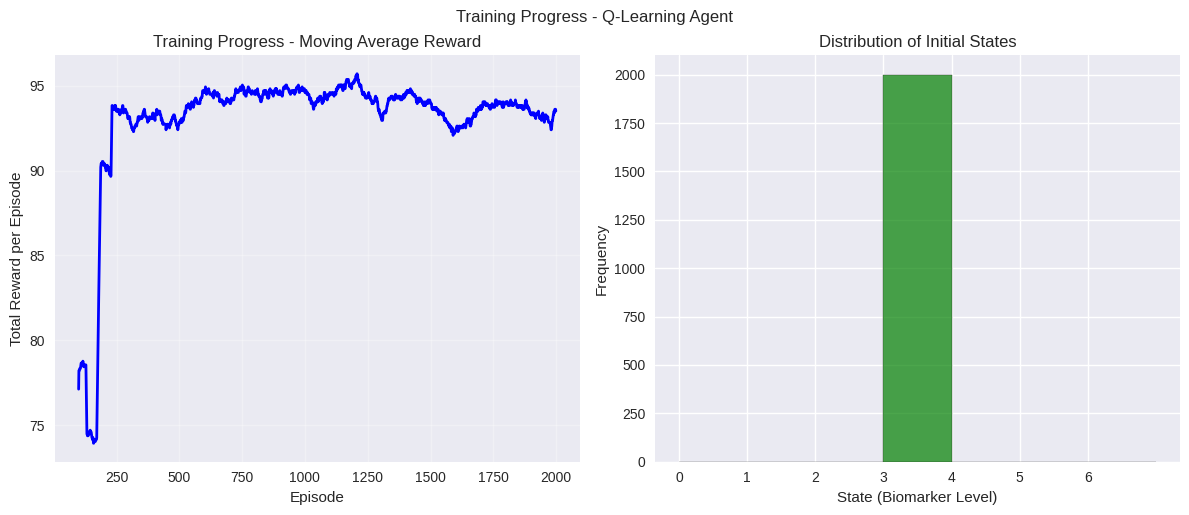

In [15]:
# Insert your code for Exercise 5 here

# Create functions
def ex_plot_training_progress(ex_rewards_history, title="Training Progress"):
    """Plot the training progress over episodes."""
    plt.figure(figsize=(12, 5))

    # Plot 1: Reward per episode (moving average)
    plt.subplot(1, 2, 1)
    window_size = max(10, len(ex_rewards_history) // 20)  # Adaptive window size
    if len(ex_rewards_history) >= window_size:
        moving_avg = np.convolve(ex_rewards_history, np.ones(window_size)/window_size, mode='valid')
        plt.plot(range(window_size-1, len(ex_rewards_history)), moving_avg, 'b-', linewidth=2)
        plt.title('Training Progress - Moving Average Reward')
    else:
        plt.plot(ex_rewards_history, 'b-', linewidth=2)
        plt.title('Training Progress')

    plt.xlabel('Episode')
    plt.ylabel('Total Reward per Episode')
    plt.grid(True, alpha=0.3)

    # Plot 2: Distribution of final states
    plt.subplot(1, 2, 2)
    final_states = []
    for _ in range(ex_num_episodes):  # Sample many states
        ex_reset_environment()
        state = current_state
        final_states.append(state)

    plt.hist(final_states, bins=range(ex_state_space_size + 1), alpha=0.7, color='green', edgecolor='black')
    plt.title('Distribution of Initial States')
    plt.xlabel('State (Biomarker Level)')
    plt.ylabel('Frequency')
    plt.xticks(range(ex_state_space_size))

    plt.tight_layout()
    plt.suptitle(title, y=1.02)
    plt.show()

# Plot training progress
ex_plot_training_progress(ex_rewards_history, "Training Progress - Q-Learning Agent")

If the code is correct you should see something _similar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image18A.png)

### **Exercise 6: Visualization Functions - Part 1**

In the cell below write the code to create a comprehensive visualization suite that translates the abstract Q-learning results into clinically meaningful insights.

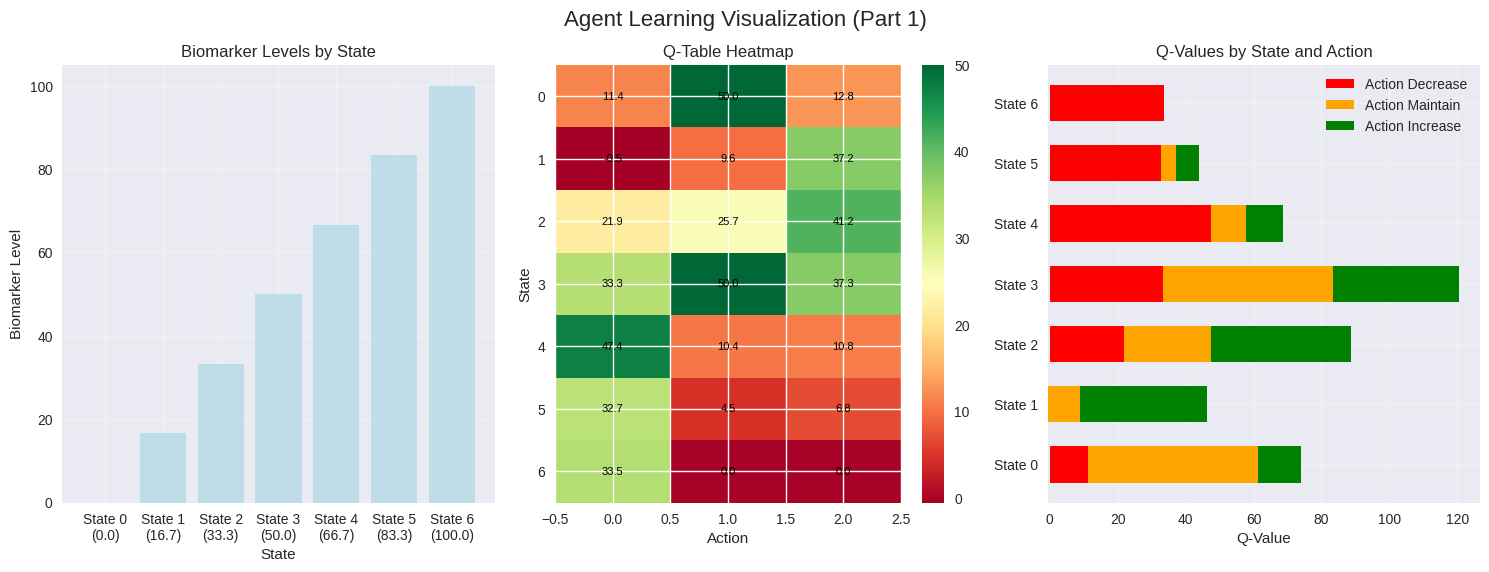

In [16]:
# Insert your code for Exercise 6 - Part 1 here

def visualize_policy_and_qtable_part1():


    """Create first half of comprehensive visualization of the learned policy."""
    fig = plt.figure(figsize=(15, 10))

    # Plot 1: Policy Visualization
    ax1 = plt.subplot(2, 3, 1)
    biomarker_levels = [i * (100 / (ex_state_space_size - 1)) for i in range(ex_state_space_size)]
    actions = ['Decrease', 'Maintain', 'Increase']

    # Get recommended action for each state
    policy_actions = []
    q_values = []

    for i in range(ex_state_space_size):
        best_action = np.argmax(q_table[i, :])
        policy_actions.append(best_action)
        q_values.append(q_table[i, :])

    bars = ax1.bar(range(len(biomarker_levels)), biomarker_levels, color='lightblue', alpha=0.7)
    ax1.set_xlabel('State')
    ax1.set_ylabel('Biomarker Level')
    ax1.set_title('Biomarker Levels by State')
    ax1.set_xticks(range(len(biomarker_levels)))
    ax1.set_xticklabels([f'State {i}\n({biomarker_levels[i]:.1f})' for i in range(len(biomarker_levels))])

    # Add grid
    ax1.grid(True, alpha=0.3)

    # Plot 2: Q-Table Heatmap
    ax2 = plt.subplot(2, 3, 2)
    q_table_array = np.array(q_table)
    im = ax2.imshow(q_table_array, cmap='RdYlGn', aspect='auto')
    ax2.set_title('Q-Table Heatmap')
    ax2.set_xlabel('Action')
    ax2.set_ylabel('State')

    # Add text annotations
    for i in range(ex_state_space_size):
        for j in range(ex_action_space_size):
            ax2.text(j, i, f'{q_table_array[i,j]:.1f}',
                    ha='center', va='center', color='black', fontsize=8)

    plt.colorbar(im, ax=ax2)

    # Plot 3: Policy Decision Matrix
    ax3 = plt.subplot(2, 3, 3)
    action_colors = ['red', 'orange', 'green']
    y_pos = np.arange(ex_state_space_size)

    for i in range(ex_action_space_size):
        values = [q_table[j, i] for j in range(ex_state_space_size)]
        ax3.barh(y_pos, values, left=np.sum(q_table[:, :i], axis=1) if i > 0 else 0,
                height=0.6, label=f'Action {actions[i]}', color=action_colors[i])

    ax3.set_yticks(y_pos)
    ax3.set_yticklabels([f'State {i}' for i in range(ex_state_space_size)])
    ax3.set_xlabel('Q-Value')
    ax3.set_title('Q-Values by State and Action')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.suptitle('Agent Learning Visualization (Part 1)', y=1.02, fontsize=16)
    plt.show()

# Visualize first half of policy and q-table
visualize_policy_and_qtable_part1()


If the code is correct you should see something _similiar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image14A.png)

### **Exercise 5: Visualization Functions - Part 2**

In the cell below write the code to create Part 2 of the comprehensive visualization suite that translates the abstract Q-learning results into clinically meaningful insights.

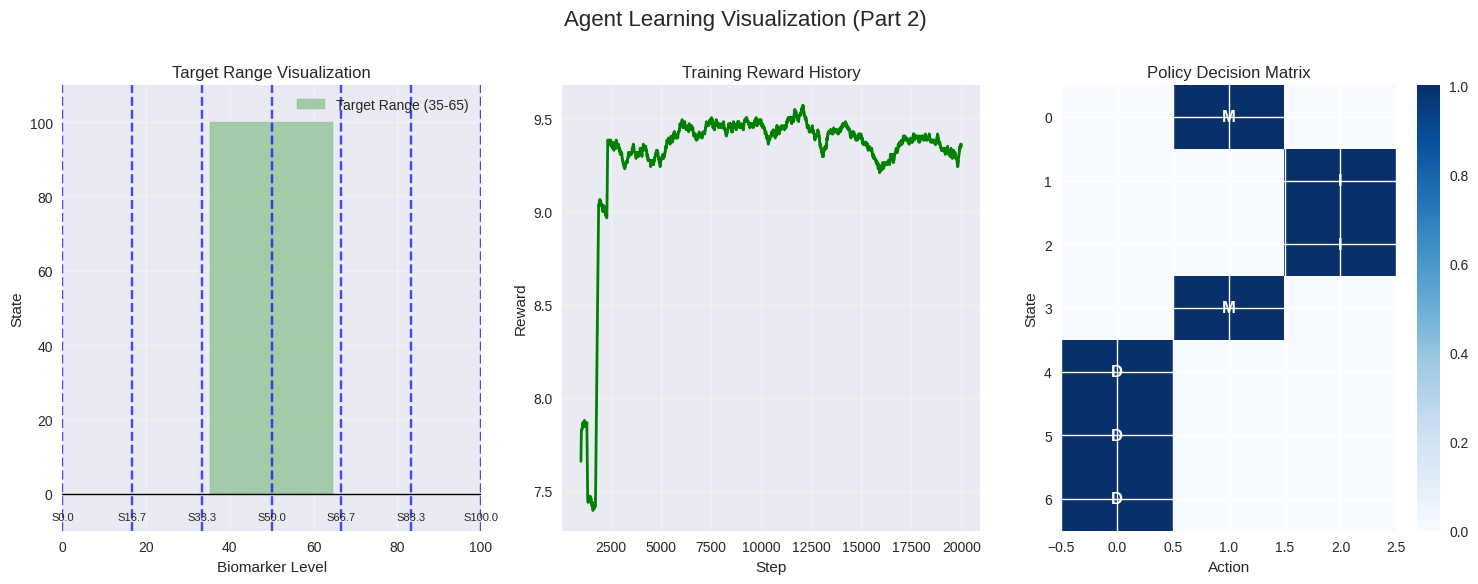

In [17]:
# Insert your code for Exercise 5 - Part 2


def visualize_policy_and_qtable_part2():
    """Create second half of comprehensive visualization of the learned policy."""
    fig = plt.figure(figsize=(15, 10))

    # Define actions again to avoid NameError
    actions = ['Decrease', 'Maintain', 'Increase']

    # Plot 4: Target Range Visualization
    ax4 = plt.subplot(2, 3, 4)
    x_values = np.linspace(0, 100, 100)
    target_range_local = ex_target_range

    # Plot target range area
    ax4.fill_between(x_values, 0, 100, where=(x_values >= target_range_local[0]) & (x_values <= target_range_local[1]),
                    alpha=0.3, color='green', label=f'Target Range ({target_range_local[0]}-{target_range_local[1]})')
    ax4.plot(x_values, [0]*len(x_values), 'k-', linewidth=1)

    # Add vertical lines for state boundaries
    for i in range(ex_state_space_size):
        biomarker_value = i * (100 / (ex_state_space_size - 1))
        ax4.axvline(biomarker_value, color='blue', linestyle='--', alpha=0.7)
        ax4.text(biomarker_value, -5, f'S{biomarker_value:.1f}',
                ha='center', va='top', fontsize=8)

    ax4.set_xlim(0, 100)
    ax4.set_ylim(-10, 110)
    ax4.set_xlabel('Biomarker Level')
    ax4.set_ylabel('State')
    ax4.set_title('Target Range Visualization')
    ax4.legend()
    ax4.grid(True, alpha=0.3)

    # Plot 5: Reward History
    ax5 = plt.subplot(2, 3, 5)
    if len(ex_training_history) > 0:
        window_size = max(10, len(ex_training_history) // 20)
        if len(ex_training_history) >= window_size:
            moving_avg = np.convolve(ex_training_history, np.ones(window_size)/window_size, mode='valid')
            ax5.plot(range(window_size-1, len(ex_training_history)), moving_avg, 'g-', linewidth=2)
        else:
            ax5.plot(ex_training_history, 'g-', linewidth=2)
        ax5.set_title('Training Reward History')
        ax5.set_xlabel('Step')
        ax5.set_ylabel('Reward')
        ax5.grid(True, alpha=0.3)

    # Plot 6: Policy Summary
    ax6 = plt.subplot(2, 3, 6)
    policy_summary = []
    for i in range(ex_state_space_size):
        action_idx = np.argmax(q_table[i, :])
        biomarker_value = i * (100 / (eg_state_space_size - 1))

        # Determine if state is within target range
        in_target = ex_target_range[0] <= biomarker_value <= ex_target_range[1]
        policy_summary.append((i, biomarker_value, actions[action_idx], in_target))

    # Create a heatmap of the policy decision matrix
    policy_matrix = np.zeros((ex_state_space_size, eg_action_space_size))
    for i in range(ex_state_space_size):
        best_action = np.argmax(q_table[i, :])
        policy_matrix[i, best_action] = 1

    im2 = ax6.imshow(policy_matrix, cmap='Blues', aspect='auto')
    ax6.set_title('Policy Decision Matrix')
    ax6.set_xlabel('Action')
    ax6.set_ylabel('State')

    # Add text annotations
    for i in range(ex_state_space_size):
        for j in range(ex_action_space_size):
            if policy_matrix[i, j] > 0.5:
                ax6.text(j, i, actions[j][0],
                        ha='center', va='center', color='white', fontsize=12, fontweight='bold')

    plt.colorbar(im2, ax=ax6)

    plt.tight_layout()
    plt.suptitle('Agent Learning Visualization (Part 2)', y=0.58, fontsize=16)
    plt.show()

# Visualize second half of policy and q-table
visualize_policy_and_qtable_part2()


If the code is correct you should see something _similar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image19A.png)

### **Exercise 6: Biomarker Trajectories**

In the cell below write the code to provide empirical validation and performance demonstration of the reinforcement learning agent's learning process.


Plotting biomarker level trajectories...


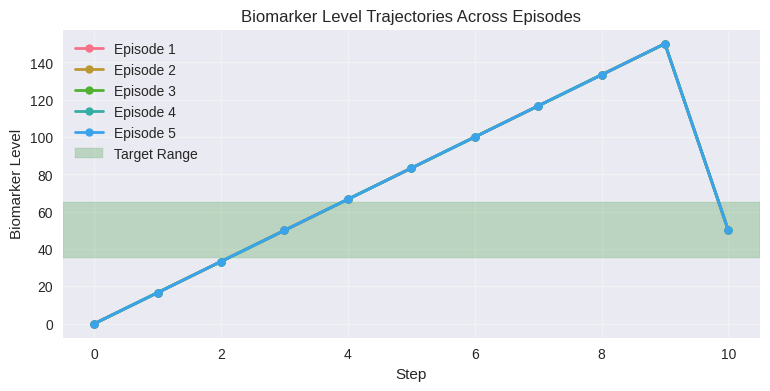


Final Policy Summary:
  State 0 (0.0): Recommend Maintain
  State 1 (25.0): Recommend Increase
  State 2 (50.0): Recommend Increase
  State 3 (75.0): Recommend Maintain
  State 4 (100.0): Recommend Decrease

Final Q-Table:
[[11.36048907 49.97477123 12.78394057]
 [-0.53787067  9.58154627 37.19510189]
 [21.88082635 25.70369878 41.18126355]
 [33.33094859 50.         37.27560122]
 [47.42835243 10.4394005  10.78811255]
 [32.68462706  4.51689875  6.76863365]
 [33.5300198   0.          0.        ]]


In [18]:
# Insert your code for Exercise 6 here

def ex_plot_biomarker_trajectory(num_episodes=5):
    """Plot the trajectory of biomarker levels during episodes."""
    # plt.figure(figsize=(12, 8))
    plt.figure(figsize=(9, 4))
    for episode in range(num_episodes):
        ex_reset_environment()  # Reset environment at start of each episode
        state = current_state

        trajectory = []

        # Run one episode
        for step in range(10):  # Maximum steps per episode
            action = ex_choose_action(state)
            next_state, reward, done = ex_step_environment(action)
            trajectory.append(step * (100 / (ex_state_space_size - 1)) if ex_state_space_size > 1 else 50)  # Simplified biomarker level
            state = next_state

        trajectory.append(state * (100 / (ex_state_space_size - 1)) if ex_state_space_size > 1 else 50)

        plt.plot(range(len(trajectory)), trajectory, marker='o', linewidth=2,
                markersize=6, label=f'Episode {episode + 1}')

    # Add target range
    plt.axhspan(ex_target_range[0], ex_target_range[1], alpha=0.2, color='green', label='Target Range')

    plt.xlabel('Step')
    plt.ylabel('Biomarker Level')
    plt.title('Biomarker Level Trajectories Across Episodes')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Plot biomarker trajectories
print("\nPlotting biomarker level trajectories...")
ex_plot_biomarker_trajectory(num_episodes=5)

# Final evaluation
print("\nFinal Policy Summary:")
for state in range(eg_state_space_size):
    action = np.argmax(q_table[state, :])
    biomarker_value = state * (100 / (eg_state_space_size - 1))
    action_names = ['Decrease', 'Maintain', 'Increase']
    print(f"  State {state} ({biomarker_value:.1f}): Recommend {action_names[action]}")

# Display the Q-table
print("\nFinal Q-Table:")
print(q_table)

If the code is correct you should see something _similar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_06/class_06_1_image20A.png)

## **Lesson Turn-in**

When you have completed and run all of the code cells, use the **File --> Print.. --> Save to PDF** to generate a PDF of your Colab notebook if you are using a Mac. If you are using a Windows computer, then use the **File --> Print.. --> Microsoft Print to PDF** to generate a PDF of your Colab notebook. Save your PDF as `Class_06_4.lastname.pdf` where _lastname_ is your last name, and upload the file to Canvas.

## **Lizard Tail**

## **Women in Computing**


![__](https://upload.wikimedia.org/wikipedia/commons/a/ac/Marissa_Mayer_LeWeb_2008_VI.jpg)

#### **Former vice-president of Google Search Products and User Experience, former president and CEO of Yahoo!, Marissa Mayer**

"Tedious" computing and calculating was seen as "women's work" through the 1940s resulting in the term "kilogirl", invented by a member of the Applied Mathematics Panel in the early 1940s. A kilogirl of energy was "equivalent to roughly a thousand hours of computing labor." While women's contributions to the United States war effort during World War II was championed in the media, their roles and the work they did was minimized. This included minimizing the complexity, skill and knowledge needed to work on computers or work as human computers.[46] During WWII, women did most of the ballistics computing, seen by male engineers as being below their level of expertise. Black women computers worked as hard (or more often, even harder) as their white counterparts, but in segregated situations. By 1943, almost all people employed as computers were women; one report said "programming requires lots of patience, persistence and a capacity for detail and those are traits that many girls have".

NACA expanded its pool of women human computers in the 1940s. NACA recognized in 1942 that "the engineers admit themselves that the girl computers do the work more rapidly and accurately than they could." In 1943 two groups, segregated by race, worked on the east and west side of Langley Air Force Base.[51] The black women were the West Area Computers. Unlike their white counterparts, the black women were asked by NACA to re-do college courses they had already passed and many never received promotions.

Women were also working on ballistic missile calculations. In 1948, women such as Barbara Paulson were working on the WAC Corporal, determining trajectories the missiles would take after launch.

Women worked with cryptography and, after some initial resistance, many operated and worked on the Bombe machines. Joyce Aylard operated the Bombe machine testing different methods to break the Enigma code. Joan Clarke was a cryptographer who worked with her friend, Alan Turing, on the Enigma machine at Bletchley Park. When she was promoted to a higher salary grade, there were no positions in the civil service for a "senior female cryptanalyst," and she was listed as a linguist instead. While Clarke developed a method of increasing the speed of double-encrypted messages, unlike many of the men, her decryption technique was not named after her. Other cryptographers at Bletchley included Margaret Rock, Mavis Lever (later Batey), Ruth Briggs and Kerry Howard. In 1941, Batey's work enabled the Allies to break the Italians' naval code before the Battle of Cape Matapan. In the United States, several faster Bombe machines were created. Women, like Louise Pearsall, were recruited from the WAVES to work on code breaking and operate the American Bombe machines.

Hedy Lamarr and co-inventor, George Antheil, worked on a frequency hopping method to help the Navy control torpedoes remotely. The Navy passed on their idea, but Lamarr and Antheil received a patent for the work on August 11, 1942. This technique would later be used again, first in the 1950s at Sylvania Electronic Systems Division and is used in everyday technology such as Bluetooth and Wi-Fi.

Marlyn Wescoff, standing, and Ruth Lichterman reprogram the ENIAC in 1946.
Marlyn Wescoff (standing) and Ruth Lichterman reprogram the ENIAC in 1946
The programmers of the ENIAC computer in 1944, were six female mathematicians; Marlyn Meltzer, Betty Holberton, Kathleen Antonelli, Ruth Teitelbaum, Jean Bartik, and Frances Spence, who were human computers at the Moore School's computation lab.[63] Adele Goldstine was their teacher and trainer and they were known as the "ENIAC girls." The women who worked on ENIAC were warned that they would not be promoted into professional ratings which were only for men.[66] Designing the hardware was "men's work" and programming the software was "women's work."[67] Sometimes women were given blueprints and wiring diagrams to figure out how the machine worked and how to program it. They learned how the ENIAC worked by repairing it, sometimes crawling through the computer, and by fixing "bugs" in the machinery.[68] Even though the programmers were supposed to be doing the "soft" work of programming, in reality, they did that and fully understood and worked with the hardware of the ENIAC. When the ENIAC was revealed in 1946, Goldstine and the other women prepared the machine and the demonstration programs it ran for the public. None of their work in preparing the demonstrations was mentioned in the official accounts of the public events. After the demonstration, the university hosted an expensive celebratory dinner to which none of the ENIAC six were invited.

In Canada, Beatrice Worsley started working at the National Research Council of Canada in 1947 where she was an aerodynamics research officer.[73] A year later, she started working in the new Computational Centre at the University of Toronto.[73] She built a differential analyzer in 1948 and also worked with IBM machines in order to do calculations for Atomic Energy of Canada Limited. She went to study the EDSAC at the University of Cambridge in 1949. She wrote the program that was run the first time EDSAC performed its first calculations on May 6, 1949.

Grace Hopper was the first person to create a compiler for a programming language and one of the first programmers of the Harvard Mark I computer, an electro-mechanical computer based on Analytical Engine. Hopper's work with computers started in 1943, when she started working at the Bureau of Ordnance's Computation Project at Harvard where she programmed the Harvard Mark I.[49] Hopper not only programmed the computer, but created a 500-page comprehensive manual for it.[75] Even though Hopper created the manual, which was widely cited and published, she was not specifically credited in it. Hopper is often credited with the coining of the term "bug" and "debugging" when a moth caused the Mark II to malfunction. While a moth was found and the process of removing it called "debugging," the terms were already part of the language of programmers.

**1950s**

Grace Hopper continued to contribute to computer science through the 1950s. She brought the idea of using compilers from her time at Harvard to UNIVAC which she joined in 1949. Other women who were hired to program UNIVAC included Adele Mildred Koss, Frances E. Holberton, Jean Bartik, Frances Morello and Lillian Jay. To program the UNIVAC, Hopper and her team used the FLOW-MATIC programming language, which she developed. Holberton wrote a code, C-10, that allowed for keyboard inputs into a general-purpose computer. Holberton also developed the Sort-Merge Generator in 1951 which was used on the UNIVAC I. The Sort-Merge Generator marked the first time a computer "used a program to write a program." Holberton suggested that computer housing should be beige or oatmeal in color which became a long-lasting trend. Koss worked with Hopper on various algorithms and a program that was a precursor to a report generator.

Klara Dan von Neumann was one of the main programmers of the MANIAC, a more advanced version of ENIAC. Her work helped the field of meteorology and weather prediction.

The NACA, and subsequently NASA, recruited women computers following World War II.[43] By the 1950s, a team was performing mathematical calculations at the Lewis Research Center in Cleveland, Ohio, including Annie Easley, Katherine Johnson and Kathryn Peddrew. At the National Bureau of Standards, Margaret R. Fox was hired to work as part of the technical staff of the Electronic Computer Laboratory in 1951. In 1956, Gladys West was hired by the U.S. Naval Weapons Laboratory as a human computer. West was involved in calculations that let to the development of GPS.

At Convair Aircraft Corporation, Joyce Currie Little was one of the original programmers for analyzing data received from the wind tunnels. She used punch cards on an IBM 650 which was located in a different building from the wind tunnel. To save time in the physical delivery of the punch cards, she and her colleague, Maggie DeCaro, put on roller skates to get to and from the building faster.

In Israel, Thelma Estrin worked on the design and development of WEIZAC, one of the world's first large-scale programmable electronic computers. In the Soviet Union a team of women helped design and build the first digital computer in 1951. In the UK, Kathleen Booth worked with her husband, Andrew Booth on several computers at Birkbeck College. Kathleen Booth was the programmer and Andrew built the machines. Kathleen developed Assembly Language at this time.

**1960s**

![__](https://upload.wikimedia.org/wikipedia/commons/thumb/d/db/Margaret_Hamilton_-_restoration.jpg/1920px-Margaret_Hamilton_-_restoration.jpg)

### **Margaret Hamilton in 1969, standing next to listings of the software she and her MIT team produced for the Apollo project**

PFC Patricia Barbeau operates a tape-drive on the IBM 729 at Camp Smith.
PFC Patricia Barbeau operates a tape-drive on the IBM 729 at Camp Smith.
Milly Koss who had worked at UNIVAC with Hopper, started work at Control Data Corporation (CDC) in 1965. There she developed algorithms for graphics, including graphic storage and retrieval.

Mary K. Hawes of Burroughs Corporation set up a meeting in 1959 to discuss the creation a computer language that would be shared between businesses. Six people, including Hopper, attended to discuss the philosophy of creating a common business language (CBL). Hopper became involved in developing COBOL (Common Business Oriented Language) where she innovated new symbolic ways to write computer code. Hopper developed programming language that was easier to read and "self-documenting." After COBOL was submitted to the CODASYL Executive Committee, Betty Holberton did further editing on the language before it was submitted to the Government Printing Office in 1960. IBM were slow to adopt COBOL, which hindered its progress but it was accepted as a standard in 1962, after Hopper had demonstrated the compiler working both on UNIVAC and RCA computers. The development of COBOL led to the generation of compilers and generators, most of which were created or refined by women such as Koss, Nora Moser, Deborah Davidson, Sue Knapp, Gertrude Tierney and Jean E. Sammet.

Sammet, who worked at IBM starting in 1961 was responsible for developing the programming language, FORMAC.[96] She published a book, Programming Languages: History and Fundamentals (1969), which was considered the "standard work on programming languages," according to Denise Gürer. It was "one of the most used books in the field," according to The Times in 1972.

Between 1961 and 1963, Margaret Hamilton began to study software reliability while she was working at the US SAGE air defense system. In 1965, she was responsible for programming the software for the onboard flight software on the Apollo mission computers. After Hamilton had completed the program, the code was sent to Raytheon where "expert seamstresses" called the "Little Old Ladies" actually hardwired the code by threading copper wire through magnetic rings. Each system could store more than 12,000 words that were represented by the copper wires.

In 1964, the British Prime Minister Harold Wilson announced a "White-Hot" revolution in technology, that would give greater prominence to IT work. As women still held most computing and programming positions at this time, it was hoped that it would give them more positive career prospects. In 1965, Sister Mary Kenneth Keller became the first American woman to earn a doctorate in computer science. Keller helped develop BASIC while working as a graduate student at Dartmouth, where the university "broke the 'men only' rule" so she could use its computer science center.

In 1966, Frances "Fran" Elizabeth Allen who was developing programming language compilers at IBM Research, published a paper entitled "Program Optimization,". It laid the conceptual basis for systematic analysis and transformation of computer programs. This paper introduced the use of graph-theoretic structures to encode program content in order to automatically and efficiently derive relationships and identify opportunities for optimization.

Christine Darden began working for NASA's computing pool in 1967 having graduated from the Hampton Institute. Women were involved in the development of Whirlwind, including Judy Clapp. She created the prototype for an air defense system for Whirlwind which used radar input to track planes in the air and could direct aircraft courses.

In 1969, Elizabeth "Jake" Feinler, who was working for Stanford, made the first Resource Handbook for ARPANET. This led to the creation of the ARPANET directory, which was built by Feinler with a staff of mostly women. Without the directory, "it was nearly impossible to navigate the ARPANET."

By the end of the decade, the general demographics of programmers had shifted away from being predominantly women, as they had before the 1940s. Though women accounted for around 30 to 50 percent of computer programmers during the 1960s, few were promoted to leadership roles and women were paid significantly less than their male counterparts. Cosmopolitan ran an article in the April 1967 issue about women in programming called "The Computer Girls." Even while magazines such as Cosmopolitan saw a bright future for women in computers and computer programming in the 1960s, the reality was that women were still being marginalized.

**1970s**

In the early 1970s, Pam Hardt-English led a group to create a computer network they named Resource One and which was part of a group called Project One.[117] Her idea to connect Bay Area bookstores, libraries and Project One was an early prototype of the Internet. To work on the project, Hardt-English obtained an expensive SDS-940 computer as a donation from TransAmerica Leasing Corporation in April 1972.They created an electronic library and housed it in a record store called Leopold's in Berkeley. This became the Community Memory database and was maintained by hacker Jude Milhon. After 1975, the SDS-940 computer was repurposed by Sherry Reson, Mya Shone, Chris Macie and Mary Janowitz to create a social services database and a Social Services Referral Directory. Hard copies of the directory, printed out as a subscription service, were kept at city buildings and libraries. The database was maintained and in use until 2009.

In the early 1970s, Elizabeth "Jake" Feinler, who worked on the Resource Directory for ARPANET, and her team created the first WHOIS directory. Feinler set up a server at the Network Information Center (NIC) at Stanford which would work as a directory that could retrieve relevant information about a person or entity. She and her team worked on the creation of domains, with Feinler suggesting that domains be divided by categories based on where the computers were kept. For example, military computers would have the domain of .mil, computers at educational institutions would have .edu. Feinler worked for NIC until 1989.

Adele Goldberg was one of seven programmers that developed Smalltalk in the 1970s, and wrote the majority of the language's documentation. It was one of the first object-oriented programming languages the base of the current graphic user interface, that has its roots in the 1968 The Mother of All Demos by Douglas Engelbart. Smalltalk was used by Apple to launch Apple Lisa in 1983, the first personal computer with a GUI, and a year later its Macintosh. Windows 1.0, based on the same principles, was launched a few months later in 1985.

In the late 1970s, women such as Paulson and Sue Finley wrote programs for the Voyager mission. Voyager continues to carry their codes inside its own memory banks as it leaves the solar system. In 1979, Ruzena Bajcsy founded the General Robotics, Automation, Sensing and Perception (GRASP) Lab at the University of Pennsylvania.

In the mid-70s, Joan Margaret Winters began working at IBM as part of a "human factors project," called SHARE. In 1978, Winters was the deputy manager of the project and went on to lead the project between 1983 and 1987. The SHARE group worked on researching how software should be designed to consider human factors.

**1980s**

In 1981, Deborah Washington Brown became the first African American woman to earn a Ph.D. in computer science from Harvard University (at the time the degree was part of the applied mathematics program). Her thesis was titled "The solution of difference equations describing array manipulation in program loops". Shortly after, in 1982, Marsha R. Williams became the second African American woman to earn a Ph.D. in computer science.

Sometimes known as the "Betsy Ross of the personal computer," according to the New York Times, Susan Kare worked with Steve Jobs to design the original icons for the Macintosh. Kare designed the moving watch, paintbrush and trash can elements that made using a Mac user-friendly. Kare worked for Apple until the mid-1980s, going on to work on icons for Windows 3.0. Other types of computer graphics were being developed by Nadia Magnenat Thalmann in Canada. Thalmann started working on computer animation to develop "realistic virtual actors" first at the University of Montréal in 1980 and later in 1988 at the École Polytechnique Fédérale de Lausanne.

Computer and video games became popular in the 1980s, but many were primarily action-oriented and not designed from a woman's point of view. Stereotypical characters such as the damsel in distress featured prominently and consequently were not inviting towards women. Dona Bailey designed Centipede, where the player shoots insects, as a reaction to such games, later saying "It didn't seem bad to shoot a bug". Carol Shaw, considered to be the first modern female games designer, released a 3D version of tic-tac-toe for the Atari 2600 in 1980.Roberta Williams and her husband Ken, founded Sierra Online and pioneered the graphic adventure game format in Mystery House and the King's Quest series. The games had a friendly graphical user interface and introduced humor and puzzles. Cited as an important game designer, her influence spread from Sierra to other companies such as LucasArts and beyond. Brenda Laurel ported games from arcade versions to the Atari 8-bit computers in the late 1970s and early 1980s. She then went to work for Activision and later wrote the manual for Maniac Mansion.

1984 was the year of Women into Science and Engineering (WISE Campaign). A 1984 report by Ebury Publishing reported that in a typical family, only 5% of mothers and 19% of daughters were using a computer at home, compared to 25% of fathers and 51% of sons. To counteract this, the company launched a series of software titles designed towards women and publicized in Good Housekeeping.[146] Anita Borg, who had been noticing that women were under-represented in computer science, founded an email support group, Systers, in 1987.

As Ethernet became the standard for networking computers locally, Radia Perlman, who worked at Digital Equipment Corporation (DEC), was asked to "fix" limitations that Ethernet imposed on large network traffic. In 1985, Perlman came up with a way to route information packets from one computer to another in an "infinitely scalable" way that allowed large networks like the Internet to function.Her solution took less than a few days to design and write up. The name of the algorithm she created is the Spanning Tree Protocol. In 1986, Lixia Zhang was the only woman and graduate student to participate in the early Internet Engineering Task Force (IETF) meetings. Zhang was involved in early Internet development.

In Europe, project was developed in the mid-1980s to create an academic network in Europe using the Open System Interconnection (OSI) standards. Borka Jerman Blažič, a Yugoslavian computer scientist was invited to work on the project. She was involved in establishing a Yugoslav Research and Academic Network (YUNAC) in 1989 and registered the domain of .yu for the country.

In the field of human–computer interaction (HCI), French computer scientist, Joëlle Coutaz developed the presentation-abstraction-control (PAC) model in 1987.[152][153] She founded the User Interface group at the Laboratorire de Génie Informatique of IMAG where they worked on different problems relating to user interface and other software tools.

In 1988, Stacy Horn, who had been introduced to bulletin board systems (BBS) through The WELL, decided to create her own online community in New York, which she called the East Coast Hang Out (ECHO).Horn invested her own money and pitched the idea for ECHO to others after bankers refused to hear her business plan. Horn built her BBS using UNIX, which she and her friends taught to one another.Eventually ECHO moved an office in Tribeca in the early 1990s and started getting press attention. ECHO's users could post about topics that interested them, and chat with one another, and were provided email accounts. Around half of ECHO's users were women. ECHO was still online as of 2018.

**1990s**

By the 1990s, computing was dominated by men. The proportion of female computer science graduates peaked in 1984 around 37 per cent, and then steadily declined.[162] Although the end of the 20th century saw an increase in women scientists and engineers, this did not hold true for computing, which stagnated.[163] Despite this, they were very involved in working on hypertext and hypermedia projects in the late 1980s and early 1990s. A team of women at Brown University, including Nicole Yankelovich and Karen Catlin, developed Intermedia and invented the anchor link. Apple partially funded their project and incorporated their concepts into Apple operating systems. Sun Microsystems Sun Link Service was developed by Amy Pearl. Janet Walker developed the first system to use bookmarks when she created the Symbolics Document Examiner. In 1989, Wendy Hall created a hypertext project called Microcosm, which was based on digitized multimedia material found in the Mountbatten archive. Cathy Marshall worked on the NoteCards system at Xerox PARC. NoteCards went on to influence Apple's HyperCard. As the Internet became the World Wide Web, developers like Hall adapted their programs to include Web viewers. Her Microcosm was especially adaptable to new technologies, including animation and 3-D models. In 1994, Hall helped organize the first conference for the Web.

Following the increased popularity of the Internet in the 1990s, online spaces were set up to cater for women, including the online community Women's WIRE and the technical and support forum LinuxChix. Women's WIRE, launched by Nancy Rhine and Ellen Pack in October 1993, was the first Internet company to specifically target this demographic. A conference for women in computer-related jobs, the Grace Hopper Celebration of Women in Computing, was first launched in 1994 by Anita Borg.

Game designer Brenda Laurel started working at Interval Research in 1992, and began to think about the differences in the way girls and boys experienced playing video games. After interviewing around 1,000 children and 500 adults, she determined that games weren't designed with girls' interests in mind.[178] The girls she spoke with wanted more games with open worlds and characters they could interact with. Her research led to Interval Research giving Laurel's research team their own company in 1996, Purple Moon. Also in 1996, Mattel's game, Barbie Fashion Designer, became the first best-selling game for girls. Purple Moon's first two games based on a character called Rockett, made it to the 100 best-selling games in the years they were released. In 1999, Mattel bought out Purple Moon.


![__](https://upload.wikimedia.org/wikipedia/commons/4/40/Jaimelevyrussell.jpg)

### **Jaime Levy helped popularise the e-Zine in the 1990s**

Jaime Levy created one of the first e-Zines in the early 1990s, starting with CyberRag, which included articles, games and animations loaded onto diskettes that anyone with a Mac could access. Later, she renamed the zine to Electronic Hollywood.Billy Idol commissioned Levy to create a disk for his album, Cyberpunk. She was hired to be the creative director of the online magazine, Word, in 1995.

Cyberfeminists, VNS Matrix, made up of Josephine Starrs, Juliane Pierce, Francesca da Rimini and Virginia Barratt, created art in the early 1990s linking computer technology and women's bodies. In 1997, there was a gathering of cyberfeminists in Kassel, called the First Cyberfeminist International.

In China, Hu Qiheng, was the leader of the team who installed the first TCP/IP connection for China, connecting to the Internet on April 20, 1994. In 1995, Rosemary Candlin went to write software for CERN in Geneva. In the early 1990s, Nancy Hafkin was an important figure in working with the Association for Progressive Communications (APC) in enabling email connections in 10 African countries. Starting in 1999, Anne-Marie Eklund Löwinder began to work with Domain Name System Security Extensions (DNSSEC) in Sweden.[189] She later made sure that the domain, .se, was the world's first top level domain name to be signed with DNSSEC.

From the late 1980s until the mid-1990s, Misha Mahowald developed several key foundations of the field of Neuromorphic engineering, while working at the California Institute of Technology and later at the ETH Zurich. More than 20 years after her untimely death, the Misha Mahowald Prize was named after her to recognize excellence in the field which she helped to create.

**2000s**

In the 21st century, several attempts have been made to reduce the gender disparity in IT and get more women involved in computing again. A 2001 survey found that while both sexes use computers and the internet in equal measure, women were still five times less likely to choose it as a career or study the subject beyond standard secondary education. Journalist Emily Chang said a key problem has been personality tests in job interviews and the belief that good programmers are introverts, which tends to self-select the stereotype of an asocial white male nerd.

In 2004, the National Center for Women & Information Technology was established by Lucy Sanders to address the gender gap.[194] Carnegie Mellon University has made a concerted attempt to increase gender diversity in the computer science field, by selecting students based on a wide criteria including leadership ability, a sense of "giving back to the community" and high attainment in maths and science, instead of traditional computer programming expertise. As well as increase the intake of women into CMU, the programme produced better quality students because of the increased diversity making a stronger team.

**2010s**

Despite the pioneering work of some designers, video games are still considered biased towards men. A 2013 survey by the International Game Developers Association revealed only 22% of game designers are women, although this is substantially higher than figures in previous decades. Working to bring inclusion to the world of open source project development, Coraline Ada Ehmke drafted the Contributor Covenant in 2014. By 2018, over 40,000 software projects have started using the Contributor Covenant, including TensorFlow, Vue and Linux. In 2014, Danielle George, professor at the School of Electrical and Electronic Engineering, University of Manchester spoke at the Royal Institution Christmas Lectures on the subject of "how to hack your home", describing simple experiments involving computer hardware and demonstrating a giant game of Tetris by remote controlling lights in an office building.

In 2017, Michelle Simmons founded the first quantum computing company in Australia.[199] The team, which has made "great strides" in 2018, plans to develop a 10-qubit prototype silicon quantum integrated circuit by 2022. In the same year, Doina Precup became the head of DeepMind Montreal, working on artificial intelligence. Xaviera Kowo is a programmer from Cameroon, who won the Margaret award, for programming a robot which processes waste in 2022.

**2020s**

In 2023 the EU-Startups the leading online publication with a focus on startups in Europe published the list of top 100 of the most influential women in the startup and venture capital space in Europe.[202] The theme of the list reflects the era of innovation and technological change. That being said, there are plenty of inspiring women in Europe's startup and all around the world in VC space who are making daily changes possible and encouraging a new generation of female for entrepreneurship and innovation.